## Importación BBDD

In [2]:
from sqlalchemy import create_engine
import pandas as pd

#Datos de conexión
usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la conexión
url_conexion=f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("Conexión correcta")

except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Cargar Vista_finances
query=f"SELECT * FROM vista_finances"

try:
    df_finanzas = pd.read_sql(query, cnx)
    print(f"Vista cargada correctamente.")
except Exception as e:
    print(f"Error al cargar la vista:{e}")

#Cerrar la conexión
cnx.close()

Conexión correcta
Vista cargada correctamente.


## EDA

Comprobación de los primeros registros del dataframe y la información clave de los campos

In [3]:
df_finanzas.head()

,id,age,job,marital,education,faltante,balance,housing,loan
0,1,59,admin.,married,secondary,0,2343,1,0
1,3,56,admin.,married,secondary,0,45,0,0
2,4,41,technician,married,secondary,0,1270,1,0
3,5,55,services,married,secondary,0,2476,1,0
4,6,54,admin.,married,tertiary,0,184,0,0


In [4]:
df_finanzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11162 non-null  int64 
 1   age        11162 non-null  int64 
 2   job        11162 non-null  object
 3   marital    11162 non-null  object
 4   education  11162 non-null  object
 5   faltante   11162 non-null  int64 
 6   balance    11162 non-null  int64 
 7   housing    11162 non-null  int64 
 8   loan       11162 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 785.0+ KB


In [5]:
df_finanzas.describe()

,id,age,faltante,balance,housing,loan
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,41.232754,0.015051,1528.538524,0.473123,0.130801
std,3222.336342,11.910672,0.121761,3225.413326,0.499299,0.337198
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000
25%,2792.250000,32.000000,0.000000,122.000000,0.000000,0.000000
50%,5582.500000,39.000000,0.000000,550.000000,0.000000,0.000000
75%,8372.750000,49.000000,0.000000,1708.000000,1.000000,0.000000
max,11163.000000,95.000000,1.000000,81204.000000,1.000000,1.000000


*No hay valores nulos, el tipo de dato corresponde a las variables; la variable balance presenta mucha dispersión*

**Desafío 1: ¿En qué medida los clientes con saldos más bajos están en más riesgo de incumplimiento de crédito, y cómo ajustar nuestras políticas de crédito para mitigar este riesgo?**

Representación gráfica de las variables más relevantes para el desafío 1: columnas 'faltante' (originalmente *default*) y 'balance'

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

*NOTA: para mejorar la comprensión de los gráficos, reemplazo el nombre de la columna 'faltante' por 'incumplimiento_credito' y los valores booleanos por 'si' y 'no'*

In [7]:
df_finanzas['faltante']= df_finanzas['faltante'].replace({0:"no", 1:"si"})

df_finanzas = df_finanzas.rename(columns = {'faltante':'incumplimiento_credito'})

In [8]:
df_finanzas

,id,age,job,marital,education,incumplimiento_credito,balance,housing,loan
0,1,59,admin.,married,secondary,no,2343,1,0
1,3,56,admin.,married,secondary,no,45,0,0
2,4,41,technician,married,secondary,no,1270,1,0
3,5,55,services,married,secondary,no,2476,1,0
4,6,54,admin.,married,tertiary,no,184,0,0
...,...,...,...,...,...,...,...,...,...
11157,11159,33,blue-collar,single,primary,no,1,1,0
11158,11160,39,services,married,secondary,no,733,0,0
11159,11161,32,technician,single,secondary,no,29,0,0
11160,11162,43,technician,married,secondary,no,0,0,1


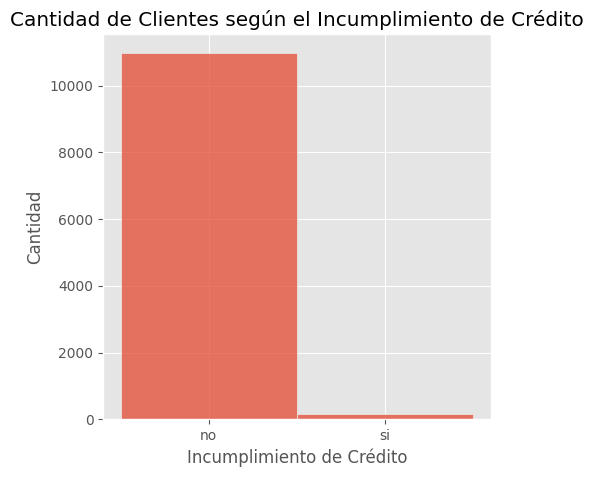

In [9]:
plt.figure(figsize=(5, 5))

sns.histplot(data=df_finanzas, x="incumplimiento_credito")

plt.title("Cantidad de Clientes según el Incumplimiento de Crédito")
plt.xlabel("Incumplimiento de Crédito")
plt.ylabel("Cantidad")
plt.show()

In [25]:
df_finanzas['incumplimiento_credito'].value_counts()

incumplimiento_credito
no    10994
si      168
Name: count, dtype: int64

Hay muy poca proporción de clientes que incumplieron con su crédito frente al resto, concretamente 168 vs. 10994 clientes. 

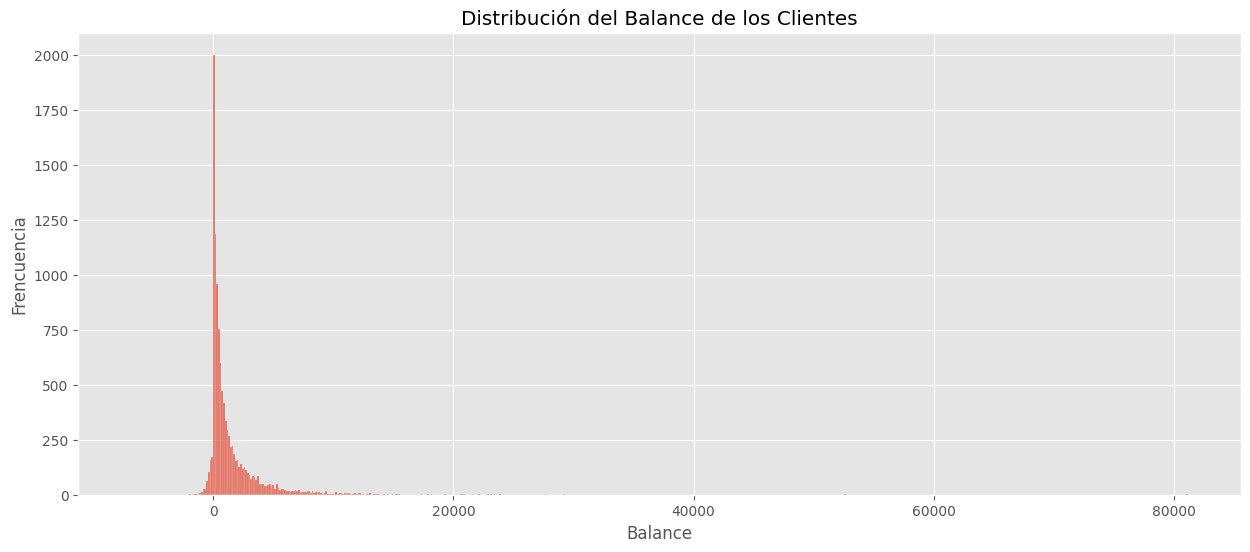

In [11]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df_finanzas, x="balance")

plt.title("Distribución del Balance de los Clientes")
plt.xlabel("Balance")
plt.ylabel("Frencuencia")
plt.show()

In [12]:
con_incumplimiento_credito = df_finanzas.query('incumplimiento_credito == "si"')

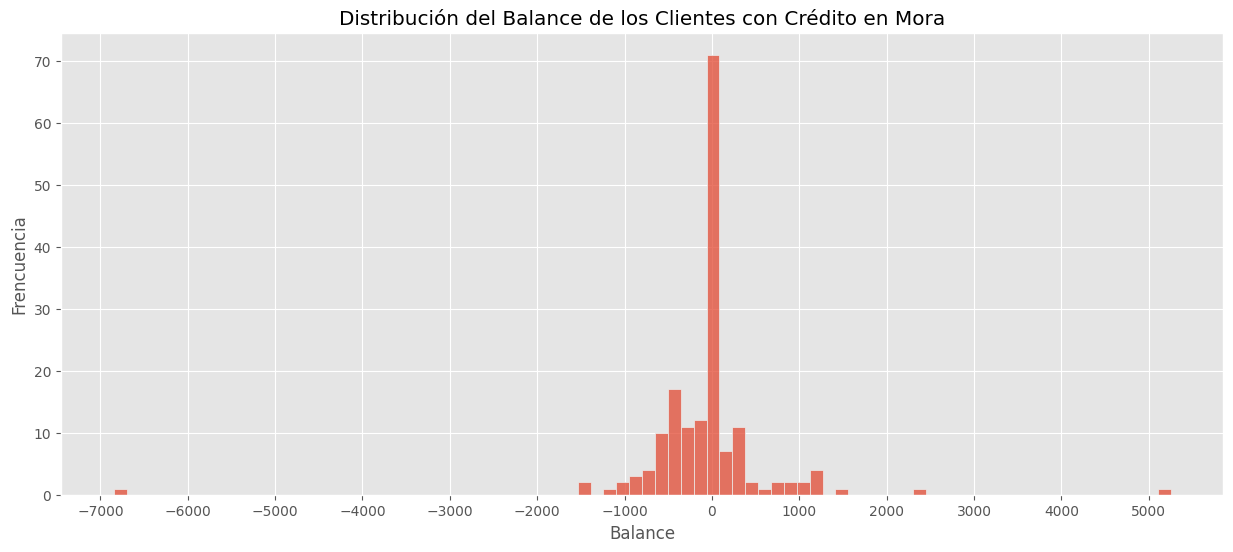

In [13]:
plt.figure(figsize=(15, 6))

sns.histplot(data=con_incumplimiento_credito, x='balance')

plt.xticks(np.arange(-7000,6000,1000))

plt.title("Distribución del Balance de los Clientes con Crédito en Mora")
plt.xlabel("Balance")
plt.ylabel("Frencuencia")
plt.show()

A continuación, vamos a confirmar la tendencia central y la dispersión del balance de los clientes, e identificar los posibles valores atípicos

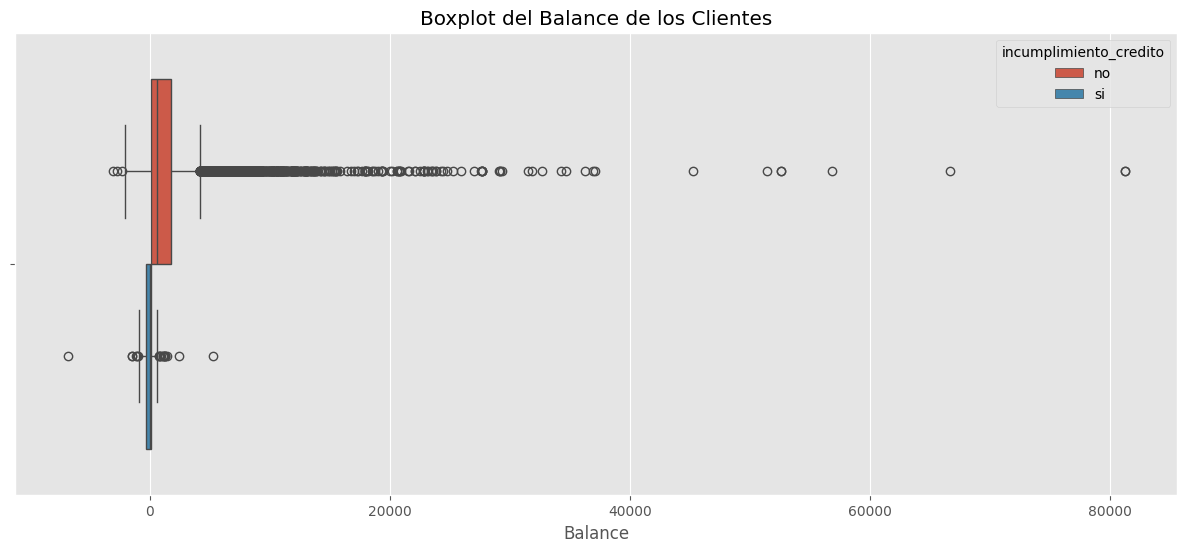

In [14]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_finanzas, x = "balance", hue = "incumplimiento_credito")

plt.title("Boxplot del Balance de los Clientes")
plt.xlabel("Balance")

plt.show()

In [26]:
df_finanzas['balance'].value_counts()

balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: count, Length: 3805, dtype: int64

El balance de los clientes que no incumplieron con el crédito presenta muchos más outliers y está más disperso. En cambio, los balances de los que sí incumplieron con su crédito estan más concentrados alrededor de 0. 

*Curiosidad*: la moda del balance es 0, con los datos que tenemos en el dataset no podemos saber exactamente qué significa. Suposiciones: cuenta sin movimientos, clientes nuevos (que se impute balance de 0 por defecto), clientes sin deudas en su cuenta (si suponemos que es de crédito; esto explicaría los balances negativos, pero no del todo los balances muy elevados)

## Análisis

Necesitamos averiguar si hay alguna asociación entre el balance bajo y el incumplimiento de crédito, y en qué medida. 

Para ello, consideramos que una de las opciones es agrupar los clientes en función del balance presente en sus cuentas y, así, poder calcular el % de incumplimiento de cada grupo y ver si existe alguna tendencia. 

Criterio de clasificación utilizado: cuartiles

In [15]:
df_finanzas['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

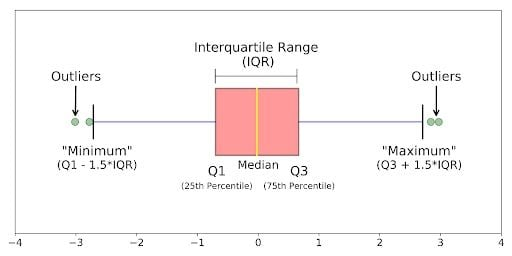

In [31]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q

Q1, Q2, Q3, min_Q, max_Q = cuartiles(df_finanzas['balance'])

print(f"Minimum: {min_Q}\n"
      f"Q1: {Q1}\n"
      f"Q2: {Q2}\n"
      f"Q3: {Q3}\n"
      f"Maximum: {max_Q}")

Minimum: -2257.0
Q1: 122.0
Q2: 550.0
Q3: 1708.0
Maximum: 4087.0


Classificación de los clientes según su balance; hemos incluído categorías específicas para tratar con los outliers negativos (categoría muy bajo) y positivos (categoría muy alto) por separado.
* Muy bajo: 
    * balance < -2257
* Bajo: 
    * -2257 ≤ balance < 122
* Medio-bajo:
    * 122 ≤ balance < 550
* Medio-alto:
    * 550 ≤ balance < 1708
* Alto:
    * 1708 ≤ balance < 4087
* Muy alto:
    * balance > 4087

In [17]:
def clasificacion_clientes (balance):
    if balance < min_Q:
        return "muy bajo"
    elif balance < Q1:
        return "bajo"
    elif balance < Q2:
        return "medio-bajo"
    elif balance < Q3:
        return "medio-alto"
    elif balance < max_Q:
        return "alto"
    else:
        return "muy alto"
    
df_finanzas["descripcion_balance"] = df_finanzas["balance"].apply(clasificacion_clientes)

In [18]:
df_finanzas

,id,age,job,marital,education,incumplimiento_credito,balance,housing,loan,descripcion_balance
0,1,59,admin.,married,secondary,no,2343,1,0,alto
1,3,56,admin.,married,secondary,no,45,0,0,bajo
2,4,41,technician,married,secondary,no,1270,1,0,medio-alto
3,5,55,services,married,secondary,no,2476,1,0,alto
4,6,54,admin.,married,tertiary,no,184,0,0,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
11157,11159,33,blue-collar,single,primary,no,1,1,0,bajo
11158,11160,39,services,married,secondary,no,733,0,0,medio-alto
11159,11161,32,technician,single,secondary,no,29,0,0,bajo
11160,11162,43,technician,married,secondary,no,0,0,1,bajo


In [28]:
categorias_balance = df_finanzas["descripcion_balance"].value_counts().reset_index(name="cantidad")

Text(0, 0.5, 'Cantidad')

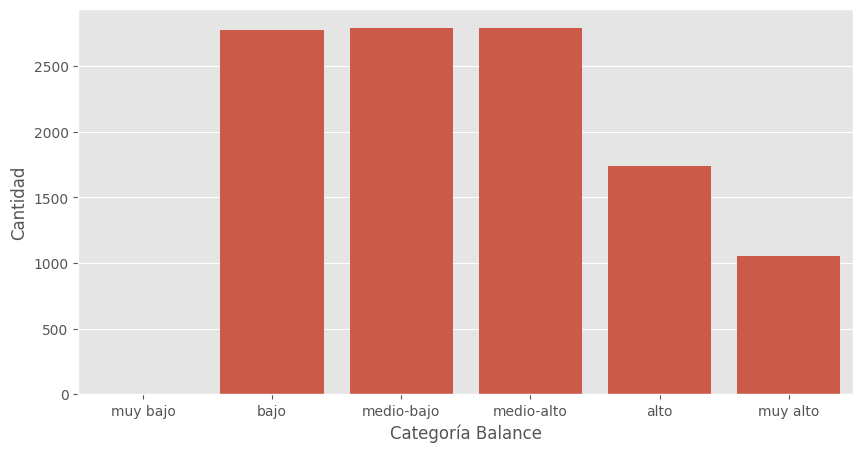

In [20]:
order = ['muy bajo', 'bajo', 'medio-bajo', 'medio-alto', 'alto', 'muy alto']

plt.figure(figsize=(10,5))
sns.barplot(data=categorias_balance, x="descripcion_balance", y="cantidad", order=order)

plt.xlabel("Categoría Balance")
plt.ylabel("Cantidad")

Prácticamente no hay outliers negativos.

In [21]:
#crear tabla con la cantidad de incumplimientos de créditos por categoría de balance
si_incumplimiento = df_finanzas.query("incumplimiento_credito == 'si'").groupby(by="descripcion_balance").size().reset_index(name="si")
no_incumplimiento = df_finanzas.query("incumplimiento_credito == 'no'").groupby(by="descripcion_balance").size().reset_index(name="no")

balance_incumplimiento = pd.merge(no_incumplimiento, si_incumplimiento, on="descripcion_balance")

#calcular el porcentaje de incumplimiento de crédito para cada categoría
balance_incumplimiento["% incumplimiento"] = (balance_incumplimiento['si']/(balance_incumplimiento['si']+balance_incumplimiento['no']))*100

#ordenar las categorías
balance_incumplimiento['descripcion_balance'] = pd.Categorical(balance_incumplimiento['descripcion_balance'], categories=order, ordered=True)
balance_incumplimiento = balance_incumplimiento.sort_values(by='descripcion_balance').reset_index(drop=True)

balance_incumplimiento

,descripcion_balance,no,si,% incumplimiento
0,muy bajo,3,1,25.000000
1,bajo,2643,136,4.893847
2,medio-bajo,2777,17,0.608447
3,medio-alto,2781,12,0.429646
4,alto,1739,1,0.057471
5,muy alto,1051,1,0.095057


En la tabla vemos que la categoría de balance muy bajo (outliers negativos) únicamente tiene 4 muestras, por lo que el porcentaje de incumplimiento es muy elevado en comparación a las otras. Hay que vigilar las conclusioens que sacamos de aquí.

Teniendo en cuenta esto, intentaremos aplicar métodos matemáticos y/o estadísticos para intentar mitigar el efecto del desbalance de la muestra y comparar los resultados. 

Text(0, 0.5, 'Porcentaje de Incumplimiento')

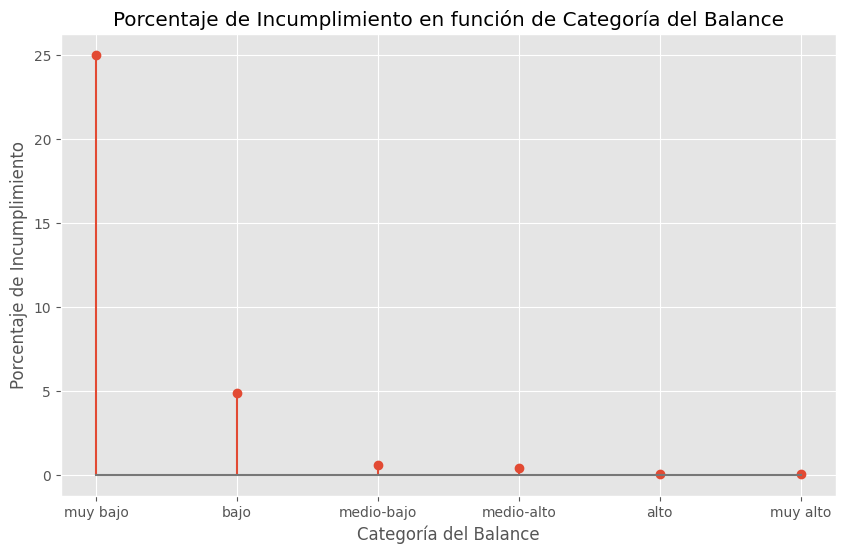

In [22]:
plt.figure(figsize=(10,6))

plt.stem(balance_incumplimiento['descripcion_balance'],balance_incumplimiento['% incumplimiento'])

plt.title("Porcentaje de Incumplimiento en función de Categoría del Balance")
plt.xlabel("Categoría del Balance")
plt.ylabel("Porcentaje de Incumplimiento")

El mismo gráfico, pero sin las categorías de los outliers (para ver mejor los porcentajes pequeños):

Text(0, 0.5, 'Porcentaje de Incumplimiento')

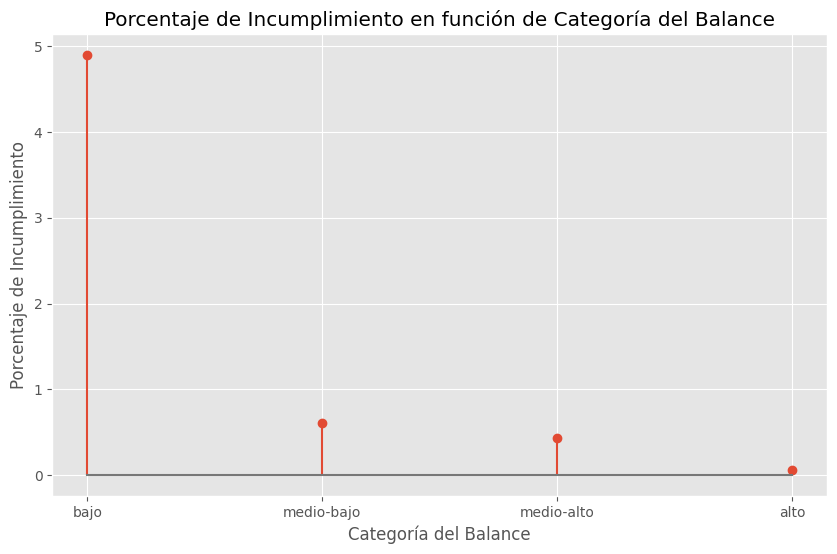

In [40]:
plt.figure(figsize=(10,6))

sin_outliers = balance_incumplimiento[1:5]

plt.stem(sin_outliers['descripcion_balance'],sin_outliers['% incumplimiento'])

plt.title("Porcentaje de Incumplimiento en función de Categoría del Balance")
plt.xlabel("Categoría del Balance")
plt.ylabel("Porcentaje de Incumplimiento")

¿Y cómo varian los porcentajes si categorizamos los outliers negativos en la categoría de balance bajo y los outliers positivos en la categoría de balance alto?

In [68]:
df_finanzas_2 = df_finanzas.copy()

df_finanzas_2['descripcion_balance'] = df_finanzas_2['descripcion_balance'].replace({"muy bajo":"bajo", "muy alto": "alto"})

balance_incumplimiento_2 = pd.merge(df_finanzas_2.query("incumplimiento_credito == 'no'").groupby(by="descripcion_balance").size().reset_index(name="no"), 
                                    df_finanzas_2.query("incumplimiento_credito == 'si'").groupby(by="descripcion_balance").size().reset_index(name="si"), 
                                    on="descripcion_balance")

#calcular el porcentaje de incumplimiento de crédito para cada categoría
balance_incumplimiento_2["% incumplimiento"] = (balance_incumplimiento_2['si']/
                                                (balance_incumplimiento_2['si']+balance_incumplimiento_2['no']))*100

#ordenar las categorías
balance_incumplimiento_2['descripcion_balance'] = pd.Categorical(balance_incumplimiento_2['descripcion_balance'], 
                                                                            categories=['bajo','medio-bajo','medio-alto','alto'], 
                                                                            ordered=True)

balance_incumplimiento_2 = balance_incumplimiento_2.sort_values(by='descripcion_balance').reset_index(drop=True)

balance_incumplimiento_2

,descripcion_balance,no,si,% incumplimiento
0,bajo,2646,137,4.922745
1,medio-bajo,2777,17,0.608447
2,medio-alto,2781,12,0.429646
3,alto,2790,2,0.071633


In [69]:
diferencia_incumplimiento = pd.merge(balance_incumplimiento,
                                     balance_incumplimiento_2,
                                     on='descripcion_balance')

diferencia_incumplimiento = diferencia_incumplimiento[['descripcion_balance', '% incumplimiento_x', '% incumplimiento_y']]
diferencia_incumplimiento['diferencia'] = diferencia_incumplimiento['% incumplimiento_y'] - diferencia_incumplimiento['% incumplimiento_x']

Text(0.5, 1.0, 'Diferencia de % Incumplimiento')

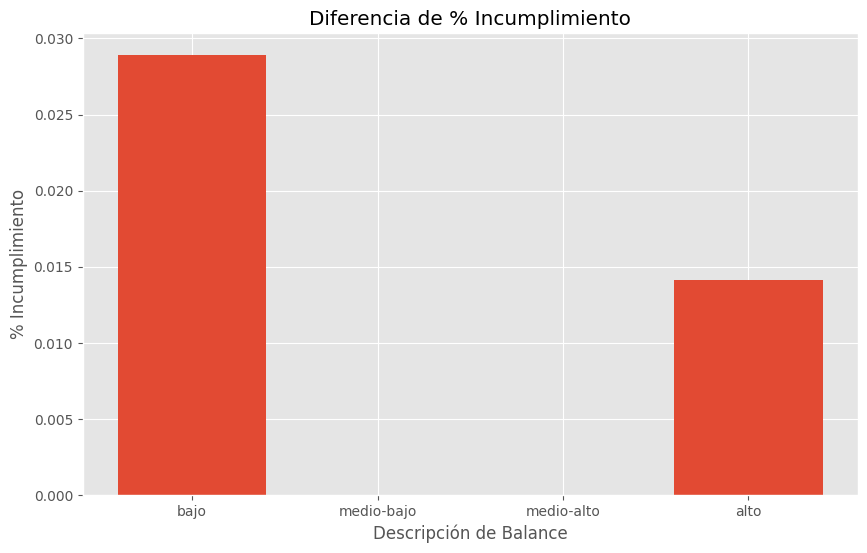

In [72]:
plt.figure(figsize=(10, 6))

plt.bar(diferencia_incumplimiento['descripcion_balance'], diferencia_incumplimiento['diferencia'])

plt.xlabel('Descripción de Balance')
plt.ylabel('% Incumplimiento')
plt.title('Diferencia de % Incumplimiento')

Tanto si separamos los datos en 6 categorías (aislando los outliers en una categoría separada), como si los separamos en 4 (categorizando los outliers a la más cercana), las diferencias en los porcentajes de incumplimiento son mínimas (como mucho 0.03%).